## Classification Tutorial
***

### Set-up

In [2]:
#number arrays
import numpy as np
#Dataframes
import pandas as pd
#plotting
import matplotlib.pyplot as plt
#logical regression.
import sklearn.linear_model as lm
#nearest neaighbours
import sklearn.neighbors as nei
#Helper funcs
import sklearn.model_selection as mod
#Stat plots
import seaborn as sns

In [3]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15,10)

# Standard colour scheme.
plt.style.use('ggplot')

### The Iris Dataset

In [4]:
# Load the iris data set from a url.
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [5]:
# Showing the data
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualise

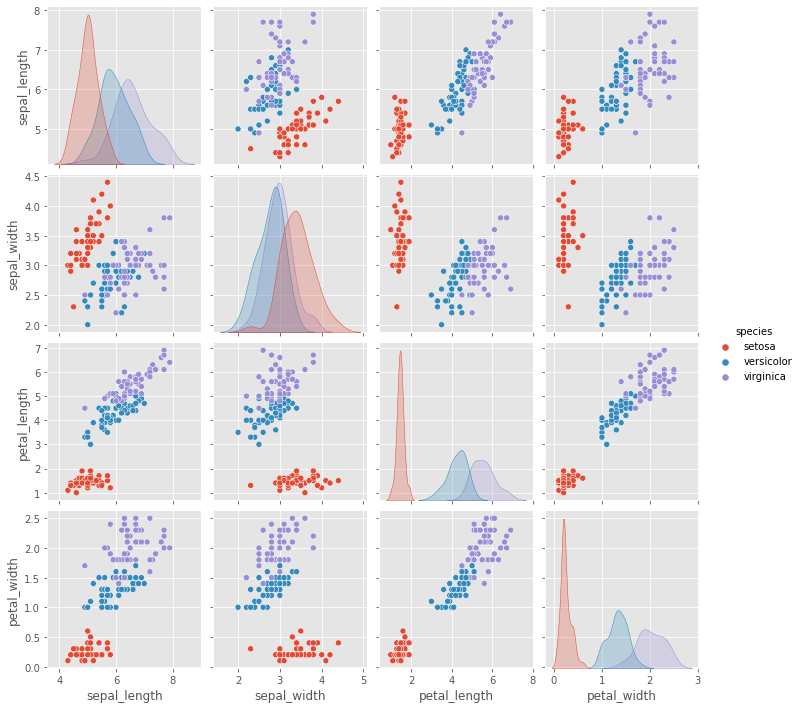

In [7]:
# Scatter plots and kdes.
sns.pairplot(df, hue='species')

### Two Dimensions

Text(0, 0.5, 'Sepal Length')

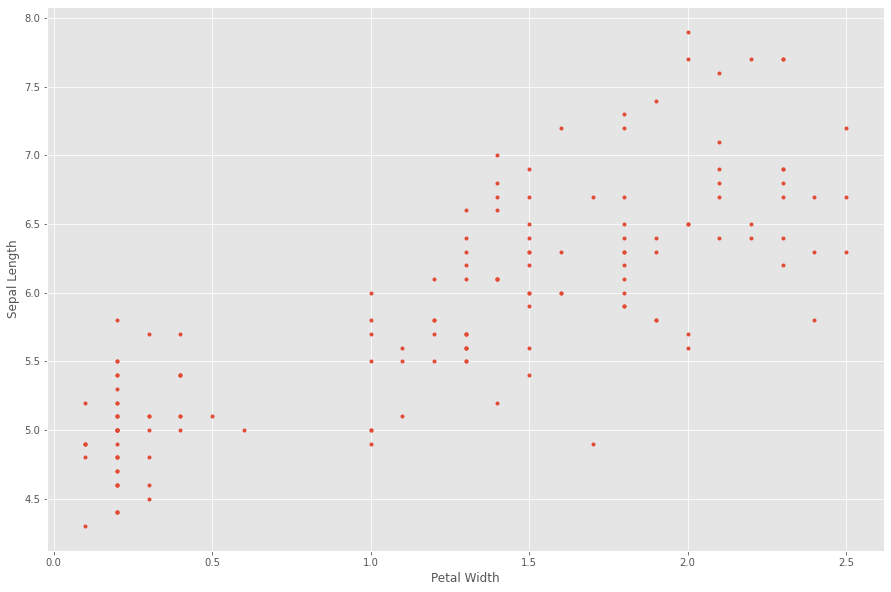

In [8]:
# new figure
fig, ax = plt.subplots()

#scatter plot
ax.plot(df['petal_width'], df['sepal_length'], '.')

#set axis
ax.set_xlabel('Petal Width')

ax.set_ylabel('Sepal Length')

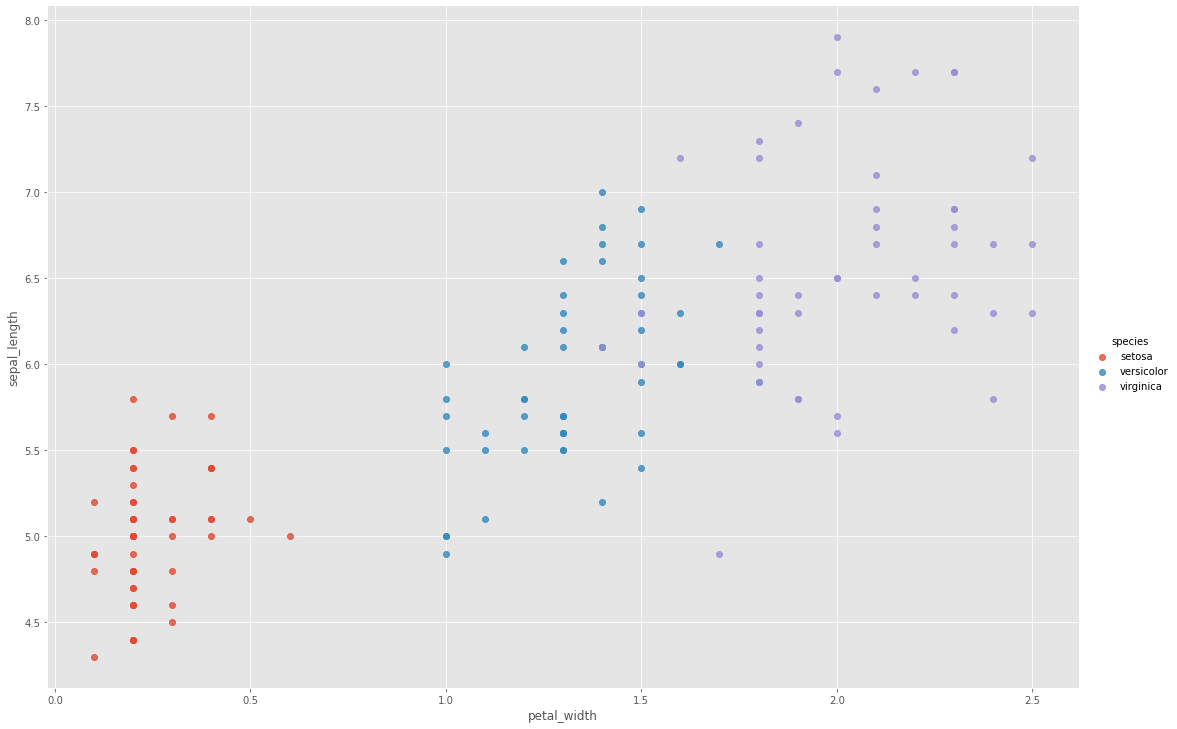

In [9]:
# Seaborn is great for creating comples plots with one command
sns.lmplot(x="petal_width", y="sepal_length", hue='species', data=df, fit_reg=False, height=10, aspect=1.5);


#### Using Pyplot
******

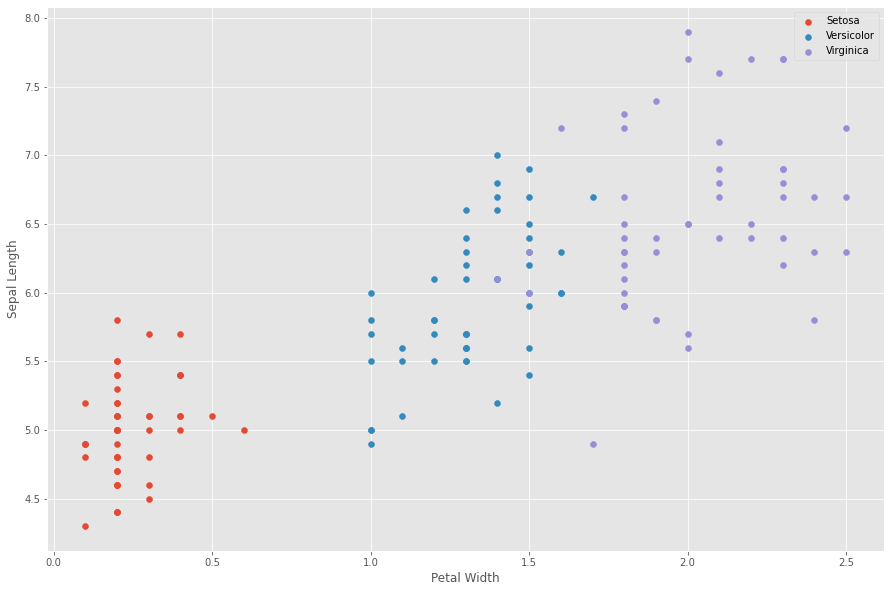

In [10]:
#Segregate the data.
setos = df[df['species'] == 'setosa']
versi = df[df['species'] == 'versicolor']
virgi = df[df['species'] == 'virginica']

#Making the new plot
fig, ax = plt.subplots()

#scatter plot
ax.scatter(setos['petal_width'], setos['sepal_length'], label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], label='Virginica')

#Legend
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.legend();

In [11]:
# how the segregation works
df['species'] == 'virginica'

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [12]:
df[df['species'] == 'virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


##### Using groupby()
***

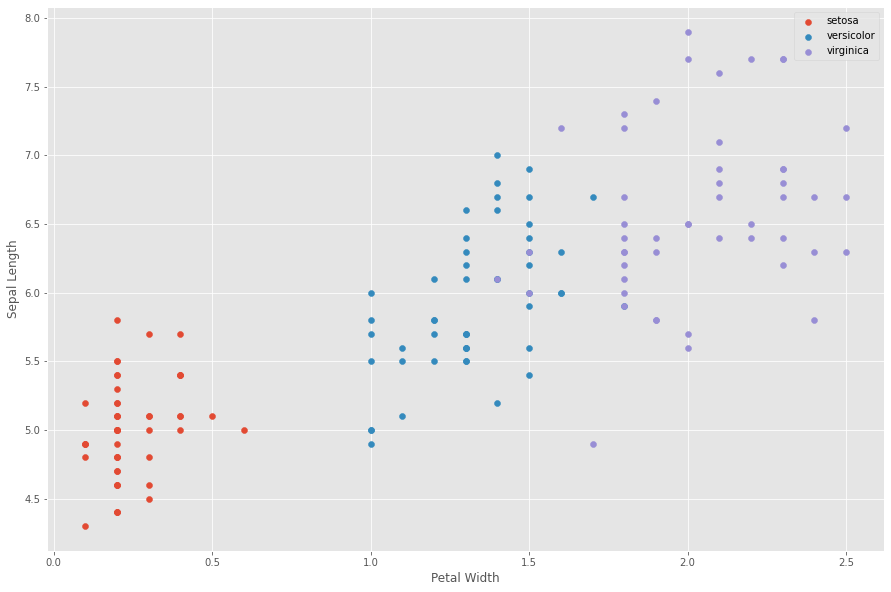

In [13]:
#new plot graph
fig,ax = plt.subplots()

#Using pandas groupby().
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)


#Legend
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.legend();

In [14]:
#Group by usually takes a categorical var.
x = df.groupby('species')
x

In [15]:
#Pivot tables
x.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [16]:
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'setosa'
j looks like:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


i is: 'versicolor'
j looks like:
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor


i is: 'virginica'
j looks like:
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica



#### Test and Train Split
***

In [17]:
#Split the data frame in two
train, test= mod.train_test_split(df)

In [18]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
63,6.1,2.9,4.7,1.4,versicolor
82,5.8,2.7,3.9,1.2,versicolor
100,6.3,3.3,6.0,2.5,virginica
44,5.1,3.8,1.9,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa


In [19]:
train.index

Int64Index([ 63,  82, 100,  44,  16,  27,  11, 143,  37,  80,
            ...
             17,  98,  15,  96, 146, 139,  92,  20,  42, 119],
           dtype='int64', length=112)

In [20]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
31,5.4,3.4,1.5,0.4,setosa
41,4.5,2.3,1.3,0.3,setosa
10,5.4,3.7,1.5,0.2,setosa
66,5.6,3.0,4.5,1.5,versicolor
46,5.1,3.8,1.6,0.2,setosa


In [21]:
test.index.size

38

#### Two Dimensions: Test Train Split
***

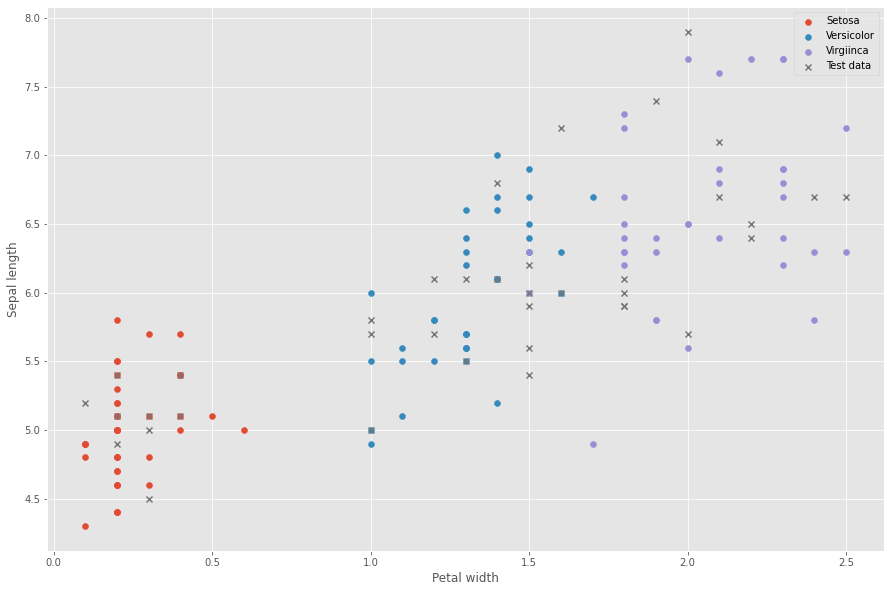

In [22]:
setos = train[train['species'] == 'setosa']
versi = train[train['species'] == 'versicolor']
virgi = train[train['species'] == 'virginica']

#new plot
fig, ax = plt.subplots()

#scatter plots for training data
ax.scatter(setos['petal_width'], setos['sepal_length'], marker='o', label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker='o', label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker='o', label='Virgiinca')

#Scatter for testing
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test data')

#legend
# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

#### Two Dimensions: Inputs and outputs
***

In [23]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['sepal_length', 'petal_width']], train['species']

In [24]:
inputs.head()

,sepal_length,petal_width
63,6.1,1.4
82,5.8,1.2
100,6.3,2.5
44,5.1,0.4
16,5.4,0.4


In [25]:
outputs.head()

63     versicolor
82     versicolor
100     virginica
44         setosa
16         setosa
Name: species, dtype: object

### Two Dimensions: Logistic regression
***
In the multiclass case, the training with the algorithm uses a one vs rest feature if the multi_class is set to ovr (one vs rest). it also uses a regularized logistic regression. To learn more on this take a look at this link
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [26]:
#Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

#Train the classifier on our data.
lre.fit(inputs,outputs)

LogisticRegression(random_state=0)

In [27]:
#ask the classifier to test data
predictions = lre.predict(test[['sepal_length', 'petal_width']])
predictions

array(['setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor'], dtype=object)

In [28]:
predictions == test['species']

31      True
41      True
10      True
66      True
46      True
67      True
53      True
144     True
32      True
130     True
127     True
129     True
84      True
71      True
68      True
131     True
124     True
70     False
21      True
134    False
113     True
83      True
138     True
140     True
104     True
73      True
40      True
60      True
78      True
79      True
61      True
95      True
102     True
1       True
149     True
132     True
19      True
76      True
Name: species, dtype: bool

In [29]:
lre.score(test[['sepal_length', 'petal_width']], test['species'])

0.9473684210526315

### Two Diemensions: Misclassified
***

In [30]:
test['predicted'] = predictions
test.head()

<ipython-input-30-4f565422beca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predictions


,sepal_length,sepal_width,petal_length,petal_width,species,predicted
31,5.4,3.4,1.5,0.4,setosa,setosa
41,4.5,2.3,1.3,0.3,setosa,setosa
10,5.4,3.7,1.5,0.2,setosa,setosa
66,5.6,3.0,4.5,1.5,versicolor,versicolor
46,5.1,3.8,1.6,0.2,setosa,setosa


In [31]:
misclass = test[test['predicted'] != test['species']]
misclass

,sepal_length,sepal_width,petal_length,petal_width,species,predicted
70,5.9,3.2,4.8,1.8,versicolor,virginica
134,6.1,2.6,5.6,1.4,virginica,versicolor


In [32]:
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.990244,3.404878,1.465854,0.239024
versicolor,5.974286,2.785714,4.231429,1.314286
virginica,6.583333,2.958333,5.544444,2.041667


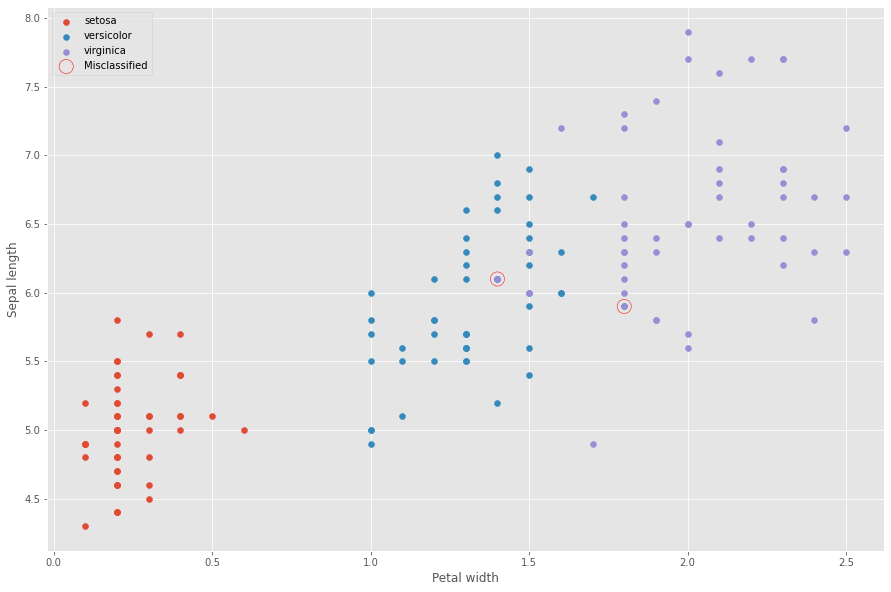

In [33]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('species'):
    ax.scatter(data['petal_width'], data['sepal_length'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['petal_width'], misclass['sepal_length'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

### Separating Setosa
***
From Wikipedia:
ℓ=logbp1−p=β0+β1x1+β2x2

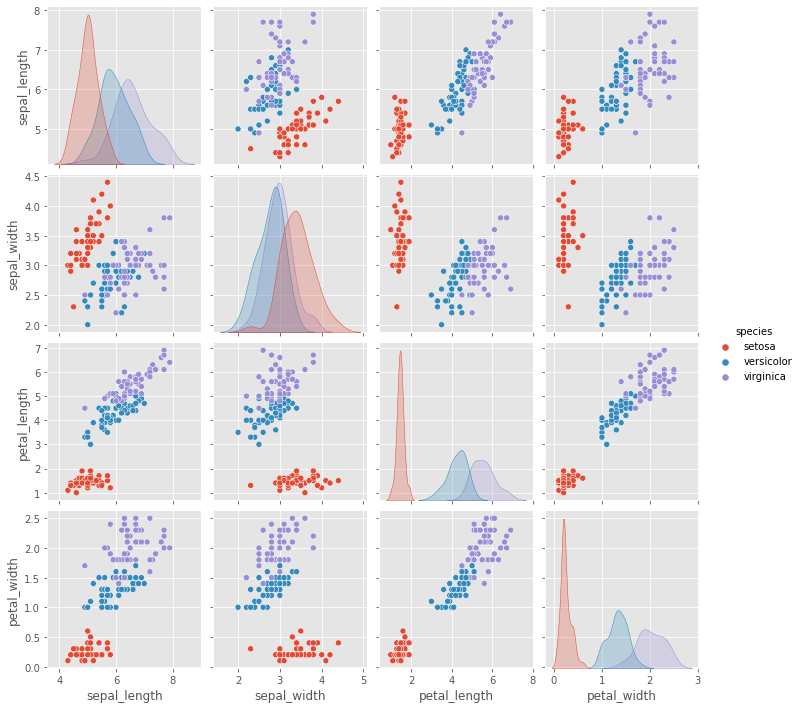

In [34]:
# A look back at this plot.
sns.pairplot(df, hue='species');

In [35]:
#input & output
inputs = train[['sepal_length', 'petal_width']]

#set versi and virgi to "other"
outputs = train['species'].apply(lambda x: x if x == 'setosa' else 'other')

outputs.unique()

array(['other', 'setosa'], dtype=object)

In [36]:
# classifier
lre = lm.LogisticRegression(random_state=0)

#train the classifier
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [37]:
actual = test['species'].apply(lambda x: x if x == 'setosa' else 'other')

# What proportion were correct?
lre.score(test[['sepal_length', 'petal_width']], actual)

1.0

### Using all possible inputs
***

In [38]:
#Loading data set from link
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [40]:
#splitting data frame in two
train, test = mod.train_test_split(df)

In [43]:
#using all possible inputs
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [44]:
#Classifier
lre = lm.LogisticRegression(random_state=0)

lre.fit(inputs, outputs)

/Users/fred/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [45]:
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
predictions

array(['virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica'], dtype=object)

In [46]:
(predictions == test['species']).value_counts()

True     36
False     2
Name: species, dtype: int64

In [50]:
lre.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

0.9473684210526315


### Nearest Neighbours Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/datasets/main/iris.csv")

In [52]:
train, test = mod.train_test_split(df)

In [53]:
inputs, outputs = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species']

In [54]:
knn = nei.KNeighborsClassifier()

In [55]:
knn.fit(inputs,outputs)

KNeighborsClassifier()

In [56]:
knn.score(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], test['species'])

1.0

In [57]:
predictions = lre.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
(predictions == test['species']).value_counts()

True    38
Name: species, dtype: int64

In [60]:
(predictions == test['species']).value_counts(normalize=True)

True    1.0
Name: species, dtype: float64

### Cross validation

https://scikit-learn.org/stable/modules/cross_validation.html

In [61]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], df['species'])
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])